In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
plt.style.use("seaborn-v0_8")

df = pd.read_csv(r"D:\FPT\kì 7\DAT\exchange-rate\data\raw\exchange_rate_to_usd.csv")

df = df.sort_values("date").set_index("date")

df.head()

,chinese_yuan_to_usd,euro_to_usd,japanese_yen_to_usd,uk_pound_to_usd,us_dollar_to_usd,algerian_dinar_to_usd,australian_dollar_to_usd,bahrain_dinar_to_usd,botswana_pula_to_usd,brazilian_real_to_usd,...,south_african_rand_to_usd,sri_lankan_rupee_to_usd,swedish_krona_to_usd,swiss_franc_to_usd,thai_baht_to_usd,trinidadian_dollar_to_usd,tunisian_dinar_to_usd,uae_dirham_to_usd,uruguayan_peso_to_usd,bolivar_fuerte_to_usd
date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,NaN,1.2592,NaN,1.7858,1.0,NaN,0.7527,2.659574,NaN,0.346212,...,0.149813,0.010313,0.138889,NaN,NaN,NaN,NaN,0.272294,NaN,NaN
2004-01-05,0.120817,1.2657,0.009355,1.7996,1.0,NaN,0.7630,2.659574,0.23115,0.346572,...,0.157233,0.010277,0.139665,0.812876,0.025393,NaN,NaN,0.272294,NaN,NaN
2004-01-06,0.120815,1.2756,0.009412,1.8209,1.0,NaN,0.7668,2.659574,0.22965,0.349418,...,0.154440,0.010245,NaN,0.813008,0.025508,0.159727,NaN,0.272294,NaN,NaN
2004-01-07,0.120814,1.2679,0.009413,1.8140,1.0,NaN,0.7677,2.659574,0.22630,0.350877,...,NaN,NaN,0.139519,0.807363,0.025602,0.159393,NaN,0.272294,NaN,NaN
2004-01-08,0.120814,1.2634,0.009421,1.8122,1.0,NaN,0.7679,2.659574,0.22400,0.348250,...,0.150602,0.010222,0.138600,0.802053,0.025630,NaN,NaN,0.272294,NaN,NaN


In [4]:
df.shape


(5541, 51)

In [5]:
df.info()


<class 'pandas.DataFrame'>
Index: 5541 entries, 2004-01-02 to 2026-01-21
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   chinese_yuan_to_usd         5144 non-null   float64
 1   euro_to_usd                 5469 non-null   float64
 2   japanese_yen_to_usd         5237 non-null   float64
 3   uk_pound_to_usd             5442 non-null   float64
 4   us_dollar_to_usd            5541 non-null   float64
 5   algerian_dinar_to_usd       3630 non-null   float64
 6   australian_dollar_to_usd    5293 non-null   float64
 7   bahrain_dinar_to_usd        3762 non-null   float64
 8   botswana_pula_to_usd        5182 non-null   float64
 9   brazilian_real_to_usd       5046 non-null   float64
 10  brunei_dollar_to_usd        5209 non-null   float64
 11  canadian_dollar_to_usd      5124 non-null   float64
 12  chilean_peso_to_usd         5274 non-null   float64
 13  colombian_peso_to_usd       4058 n

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
chinese_yuan_to_usd,5144.0,0.145265,0.012204,0.120811,0.138918,0.146394,0.154811,0.164123
euro_to_usd,5469.0,1.226908,0.128390,0.956500,1.118500,1.208200,1.322000,1.599000
japanese_yen_to_usd,5237.0,0.009246,0.001584,0.006187,0.008446,0.009122,0.009820,0.013182
uk_pound_to_usd,5442.0,1.521603,0.240318,1.065400,1.305862,1.514250,1.663850,2.102000
us_dollar_to_usd,5541.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
algerian_dinar_to_usd,3630.0,0.009572,0.002317,0.006795,0.007518,0.008722,0.012364,0.014027
australian_dollar_to_usd,5293.0,0.791658,0.120618,0.557100,0.703300,0.759000,0.882000,1.105500
bahrain_dinar_to_usd,3762.0,2.659574,0.000000,2.659574,2.659574,2.659574,2.659574,2.659574
botswana_pula_to_usd,5182.0,0.120857,0.040518,0.070500,0.090300,0.107650,0.150900,0.264300
brazilian_real_to_usd,5046.0,0.358151,0.144657,0.161082,0.204675,0.320821,0.480729,0.652018


In [ ]:
major = [
    'euro_to_usd',
    'japanese_yen_to_usd',
    'uk_pound_to_usd',
    'swiss_franc_to_usd',
    'australian_dollar_to_usd',
    'canadian_dollar_to_usd',
    'chinese_yuan_to_usd'
]

df_major = df[major]
df_major.head()


,euro_to_usd,japanese_yen_to_usd,uk_pound_to_usd,swiss_franc_to_usd,australian_dollar_to_usd,canadian_dollar_to_usd,chinese_yuan_to_usd
date,,,,,,,
2004-01-02,1.2592,NaN,1.7858,NaN,0.7527,0.775194,NaN
2004-01-05,1.2657,0.009355,1.7996,0.812876,0.7630,0.781067,0.120817
2004-01-06,1.2756,0.009412,1.8209,0.813008,0.7668,0.780092,0.120815
2004-01-07,1.2679,0.009413,1.8140,0.807363,0.7677,0.776277,0.120814
2004-01-08,1.2634,0.009421,1.8122,0.802053,0.7679,0.781983,0.120814


### tính DXY : usd index

In [ ]:
"""usd_index = chỉ số tổng hợp sức mạnh USD so với tất cả các đồng tiền trong dataset."""
df["usd_index"] = (1 / df_major).mean(axis=1)
df[["usd_index"]].head()


,usd_index
date,
2004-01-02,0.993170
2004-01-05,17.191982
2004-01-06,17.096606
2004-01-07,17.098081
2004-01-08,17.085483


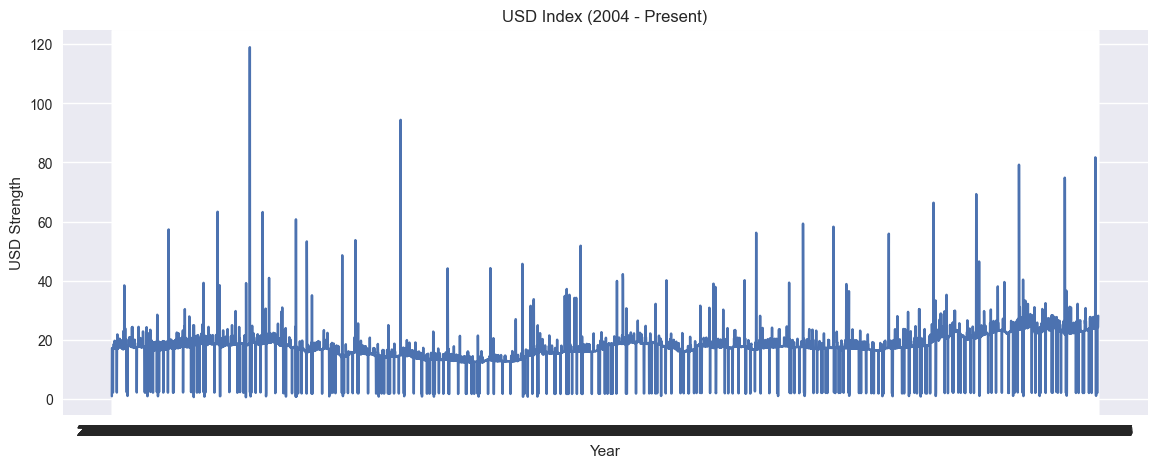

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df["usd_index"])
plt.title("USD Index (2004 - Present)")
plt.xlabel("Year")
plt.ylabel("USD Strength")
plt.show()


In [15]:
print(df.head())
print(df.columns)
print(df.index)


            chinese_yuan_to_usd  euro_to_usd  japanese_yen_to_usd  \
date                                                                
2004-01-02                  NaN       1.2592                  NaN   
2004-01-05             0.120817       1.2657             0.009355   
2004-01-06             0.120815       1.2756             0.009412   
2004-01-07             0.120814       1.2679             0.009413   
2004-01-08             0.120814       1.2634             0.009421   

            uk_pound_to_usd  us_dollar_to_usd  algerian_dinar_to_usd  \
date                                                                   
2004-01-02           1.7858               1.0                    NaN   
2004-01-05           1.7996               1.0                    NaN   
2004-01-06           1.8209               1.0                    NaN   
2004-01-07           1.8140               1.0                    NaN   
2004-01-08           1.8122               1.0                    NaN   

           

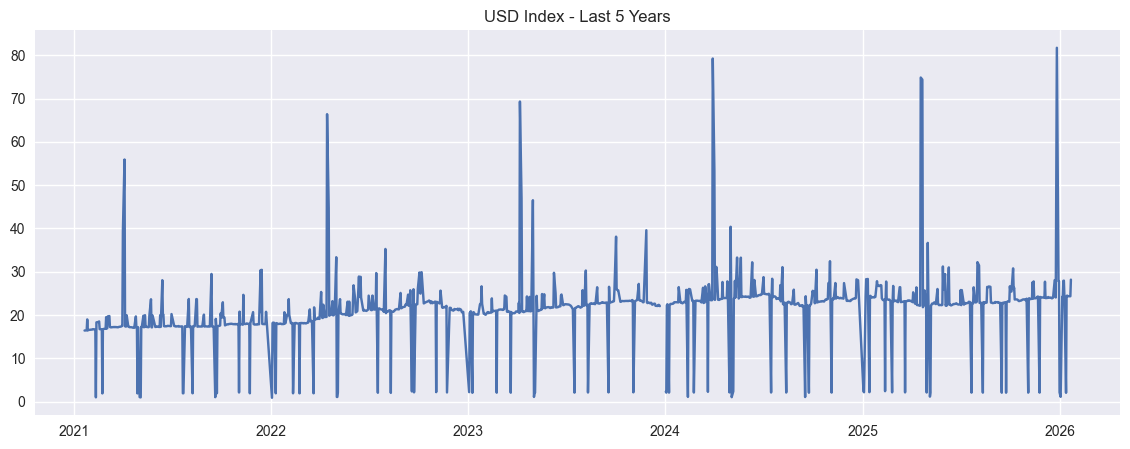

In [17]:
cutoff = df.index.max() - pd.DateOffset(years=5)

plt.figure(figsize=(14,5))
plt.plot(df[df.index >= cutoff]["usd_index"])
plt.title("USD Index - Last 5 Years")
plt.show()


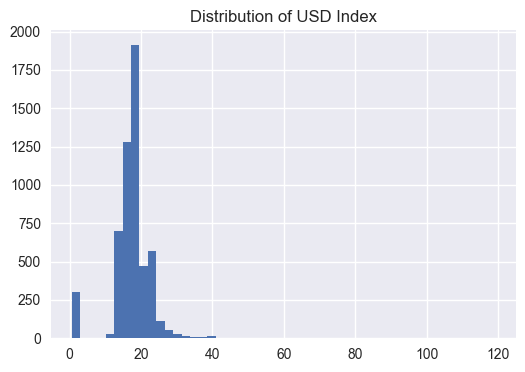

In [12]:
plt.figure(figsize=(6,4))
df["usd_index"].hist(bins=50)
plt.title("Distribution of USD Index")
plt.show()


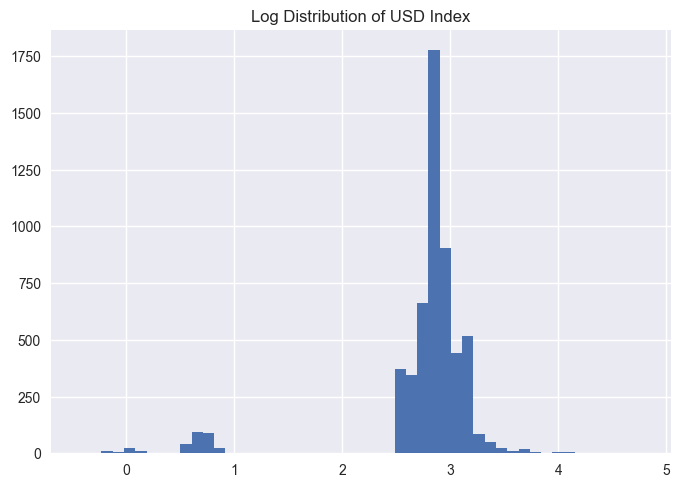

In [19]:
import numpy as np
np.log(df["usd_index"]).hist(bins=50)
plt.title("Log Distribution of USD Index")
plt.show()


usd_index = 3 == e^3 ==20

# 3/ Rolling volatility

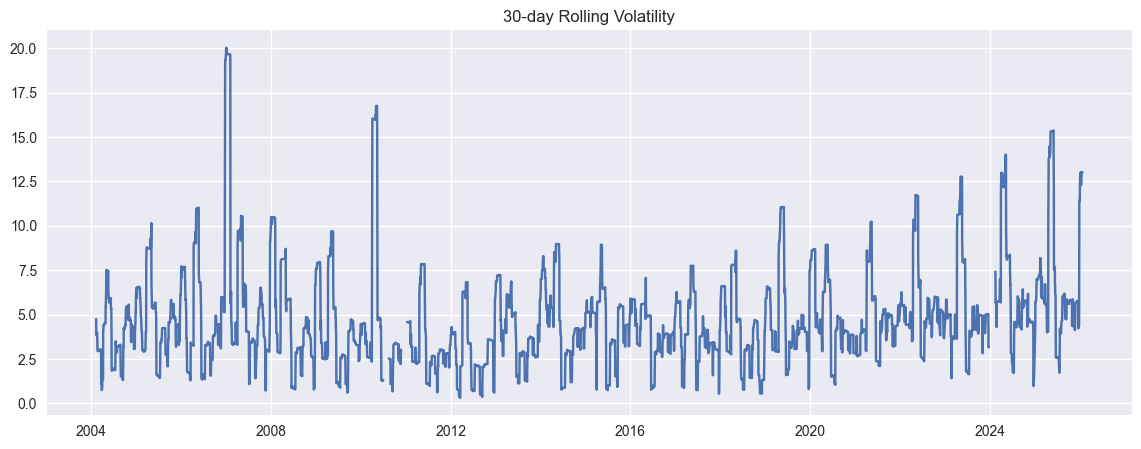

In [ ]:
# Độ biến động 30 ngày (volatility)
df["rolling_std_30"] = df["usd_index"].rolling(30).std()

plt.figure(figsize=(14,5))
plt.plot(df["rolling_std_30"])
plt.title("30-day Rolling Volatility")
plt.show()


2004–2006	Nhiễu dữ liệu

2008–2010	Sự kiện kinh tế thật

Sau 2012	Ổn định dần

### test ADF

p = 0.0018 < 0.05
→ Chuỗi đã stationary rồi.

Tức là:

Mean ổn định

In [21]:
result = adfuller(df["usd_index"].dropna())
print("ADF p-value:", result[1])


ADF p-value: 0.0018388885500195888


## test differencing

yt​=xt​−xt−1​

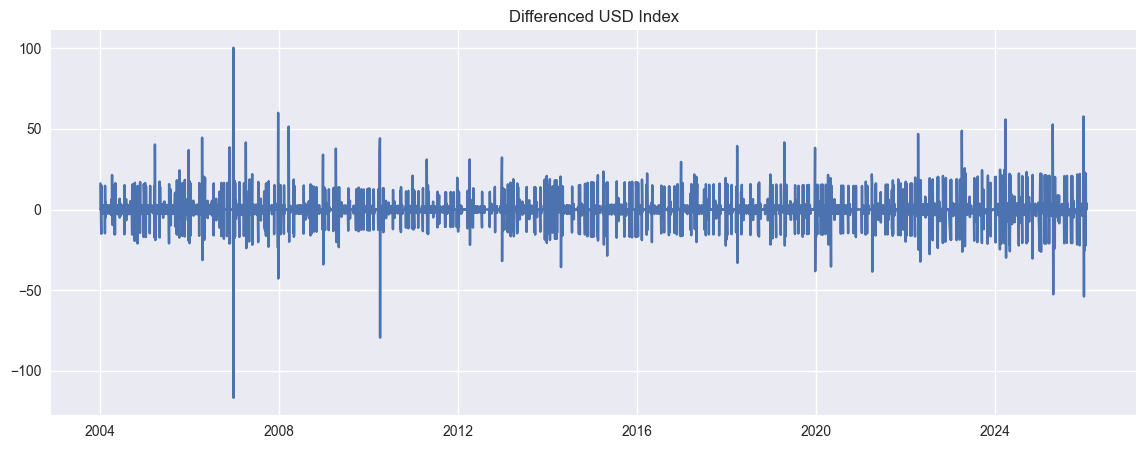

ADF after diff: 0.0


In [22]:
df["usd_diff"] = df["usd_index"].diff()

plt.figure(figsize=(14,5))
plt.plot(df["usd_diff"])
plt.title("Differenced USD Index")
plt.show()

result = adfuller(df["usd_diff"].dropna())
print("ADF after diff:", result[1])


In [ ]:
ADF cho bạn biết có cần diff không,
còn diff cho bạn dạng dữ liệu mà thị trường thật sự quan tâm.